# Lecture 06. Plotting and Visualization

### Instructor: Luping Yu

### Apr 2, 2024

***

Making informative visualizations (sometimes called plots) is one of the most important tasks in data analysis.

It may be a part of the exploratory process:
* help identify outliers or needed data transformations.
* a way of generating ideas for models.

Python has many add-on libraries for making static or dynamic visualizations, but we will be mainly focused on <code>matplotlib</code>. It is a plotting package designed for creating (mostly **two-dimensional**) publication-quality plots.

The project was started in 2002 to enable a *MATLAB-like* plotting interface in Python. <code>matplotlib</code> supports various GUI backends on all operating systems and additionally can export visualizations to all of the common vector and raster graphics formats (PDF, SVG, JPG, PNG, BMP, GIF, etc.).

The simplest way to follow the code examples in the chapter is to use interactive plotting in the <code>Jupyter notebook</code>. To set this up, execute the following statement in a Jupyter notebook:

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

***
## Plotting with pandas

In pandas we may have multiple columns of data, along with row and column labels. <code>pandas</code> itself has **built-in** methods that simplify creating visualizations from <code>DataFrame</code> and <code>Series</code> objects. 

***
### Line Plots
Series and DataFrame each have a plot attribute for making some basic plot types. By default, <code>plot()<code makes line plots:

In [1]:
import numpy as np
import pandas as pd

s = pd.Series(np.random.rand(10), index=np.arange(0, 100, 10))
# numpy.random.rand(): 生成随机数
# np.arange(): 生成等差数列

s

0     0.255241
10    0.325967
20    0.442367
30    0.602514
40    0.826144
50    0.263398
60    0.082678
70    0.158067
80    0.807388
90    0.971700
dtype: float64

If everything is set up right, a simple line plot should appear:

<Axes: >

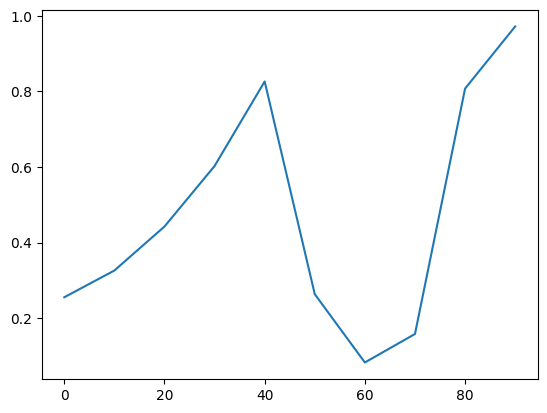

In [2]:
s.plot()

The x-axis ticks and limits can be adjusted with the <code>xticks</code> and <code>xlim</code> options, and y-axis respectively with <code>yticks</code> and <code>ylim</code>. See the following table for a full listing of plot options.

e.g. <code>s.plot(xticks=[0,60,100])</code>, <code>s.plot(xlim=[60,80])</code>

* <code>Series.plot</code> method arguments:

|Argument | Description |
|:- | :- | 
|ax | matplotlib subplot object to plot on; if nothing passed, uses active matplotlib subplot
|style | Style string, like 'ko--', to be passed to matplotlib
|alpha | The plot fill opacity (from 0 to 1)
|kind | Can be 'area', 'bar', 'barh', 'density', 'hist', 'kde', 'line', 'pie'
|logy | Use logarithmic scaling on the y-axis
|use_index | Use the object index for tick labels
|rot | Rotation of tick labels (0 through 360)
|xticks | Values to use for x-axis ticks
|yticks | Values to use for y-axis ticks
|xlim | x-axis limits (e.g., [0, 10])
|ylim | y-axis limits
|grid | Display axis grid (on by default)

<code>DataFrame</code>'s plot method plots each of its columns as a different line on the same subplot, creating a legend automatically:

In [3]:
df = pd.DataFrame(np.random.rand(10, 2),
                  columns=['A', 'B'],
                  index=np.arange(0, 100, 10))

df

A         B
0   0.677195  0.844475
10  0.236795  0.573631
20  0.999535  0.588728
30  0.010999  0.936918
40  0.909443  0.119335
50  0.601015  0.119827
60  0.007780  0.997625
70  0.225931  0.719387
80  0.184206  0.807065
90  0.442592  0.810193

<Axes: >

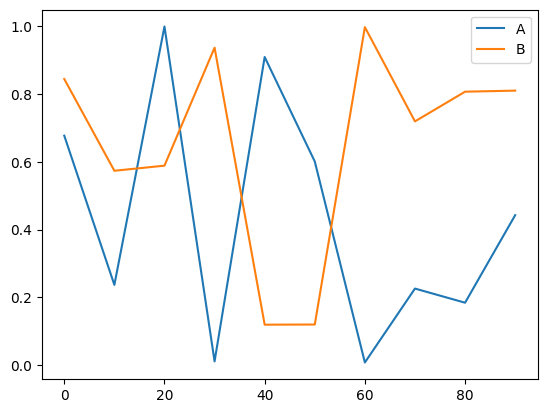

In [4]:
df.plot()

DataFrame has a number of options allowing some flexibility with how the columns are handled; for example, whether to plot them all on the same subplot or to create separate subplots.

* <code>DataFrame</code> specific plot arguments:

|Argument | Description |
|:- | :- | 
|subplots | Plot each DataFrame column in a separate subplot
|sharex | If subplots=True, share the same x-axis, linking ticks and limits
|sharey | If subplots=True, share the same y-axis
|figsize | Size of figure to create as tuple
|title | Plot title as string
|legend | Add a subplot legend (Trueby default)
|sort_columns | Plot columns in alphabetical order; by default uses existing column order


***
### Bar Plots

The plot attribute contains a "family" of methods for different plot types. For example, <code>df.plot()</code> is equivalent to <code>df.plot.line()</code>.

The <code>plot.bar()</code> and <code>plot.barh()</code> make vertical and horizontal **bar plots**, respectively. In this case, the Series or DataFrame index will be used as the x (bar) or y (barh) ticks:

In [5]:
data = pd.Series(np.random.rand(7), index=list('abcdefg'))

data

a    0.518410
b    0.356323
c    0.296187
d    0.458936
e    0.214548
f    0.233244
g    0.832255
dtype: float64

<Axes: >

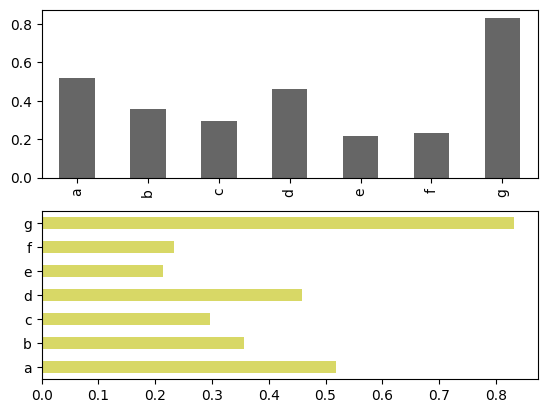

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1) # Subplot with two rows and one column

data.plot.bar(ax=axes[0], color='k', alpha=0.6)

data.plot.barh(ax=axes[1], color='y', alpha=0.6)

The options <code>color='k'</code> and <code>alpha=0.6</code> set the color of the plots to black and use partial transparency on the filling.

Reference: https://matplotlib.org/stable/tutorials/colors/colors.html

With a <code>DataFrame</code>, bar plots group the values in each row together in a group in bars, side by side, for each value.

In [7]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Figure'))

df

Figure         A         B         C         D
one     0.502299  0.245836  0.137186  0.116250
two     0.661751  0.282560  0.208969  0.874551
three   0.886527  0.594157  0.301597  0.097711
four    0.667875  0.302823  0.109927  0.958227
five    0.745396  0.004205  0.664537  0.016213
six     0.053531  0.291628  0.325740  0.281126

<Axes: >

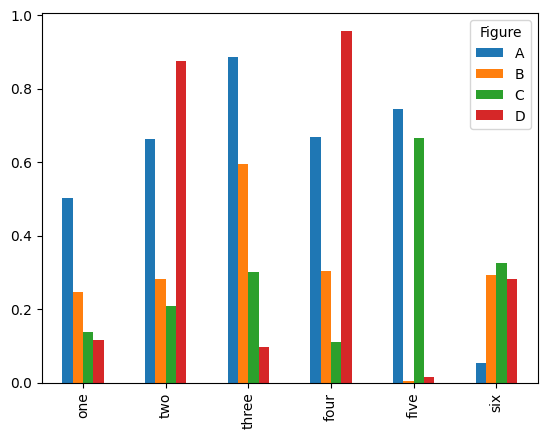

In [8]:
df.plot.bar()

Note that the name "Figure" on the DataFrame's columns is used to title the legend.

We create stacked bar plots from a DataFrame by passing <code>stacked=True</code>, resulting in the value in each row being stacked together:

<Axes: >

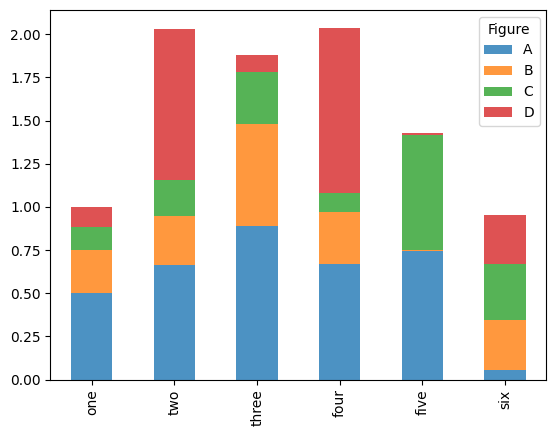

In [9]:
df.plot.bar(stacked=True, alpha=0.8)

Returning to the <code>tips.csv</code> used earlier in <u>Lecture 04</u>, suppose we wanted to make a stacked bar plot showing the percentage of data points for each party size on each day.

We load the data and make a **cross-tabulation** by day and party size:

In [10]:
tips = pd.read_csv('examples/tips.csv')

tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [11]:
party_counts = pd.crosstab(tips['day'], tips['size'])

party_counts

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3

<Axes: xlabel='day'>

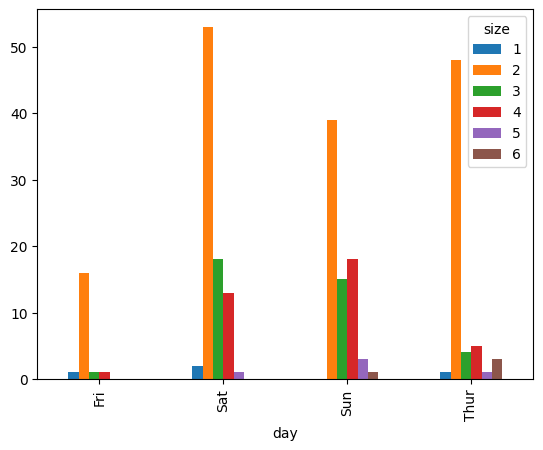

In [12]:
party_counts.plot.bar()

So you can see that party sizes appear to increase on the weekend in this dataset.

With data that requires aggregation or summarization before making a plot, using the <code>seaborn</code> package can make things much simpler.

In [13]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

tips.head()

total_bill   tip     sex smoker  day    time  size   tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2  0.063204
1       10.34  1.66    Male     No  Sun  Dinner     3  0.191244
2       21.01  3.50    Male     No  Sun  Dinner     3  0.199886
3       23.68  3.31    Male     No  Sun  Dinner     2  0.162494
4       24.59  3.61  Female     No  Sun  Dinner     4  0.172069

<Axes: xlabel='tip_pct', ylabel='day'>

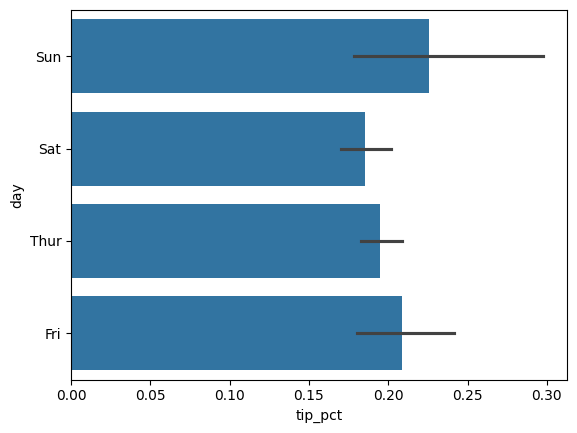

In [14]:
import seaborn as sns

sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

Plotting functions in <code>seaborn</code> take a data argument, which can be a pandas DataFrame. The other arguments refer to column names.

Because there are multiple observations for each value in the day, the bars are the **average value** of <code>tip_pct</code>. The black lines drawn on the bars represent the **95% confidence interval** (this can be configured through optional arguments).

<code>seaborn.barplot</code> has a <code>hue</code> option that enables us to split by an additional categorical value:

<Axes: xlabel='tip_pct', ylabel='day'>

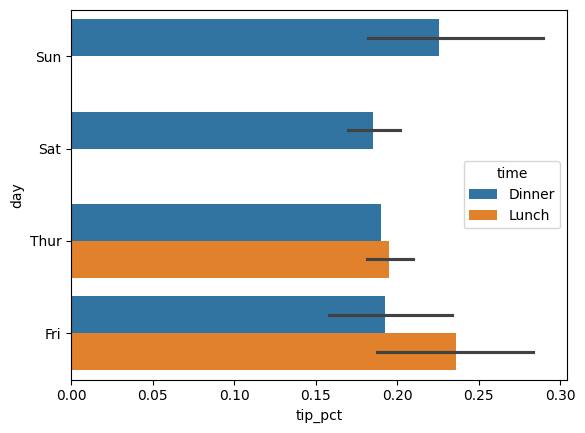

In [15]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

Notice that seaborn has automatically changed the aesthetics of plots: the default color palette, plot background, and grid line colors. You can switch between different plot appearances using <code>seaborn.set</code>:

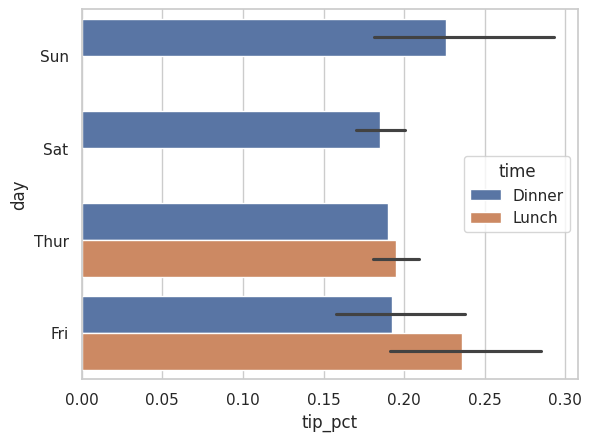

In [16]:
sns.set(style='whitegrid')
#sns.reset_orig()

sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

***

### Facet Grids and Categorical Data
What about datasets where we have additional grouping dimensions? One way to visualize data with many categorical variables is to use a <code>catplot</code>.

Seaborn has a useful built-in function <code>catplot</code> that simplifies making many kinds of plots:

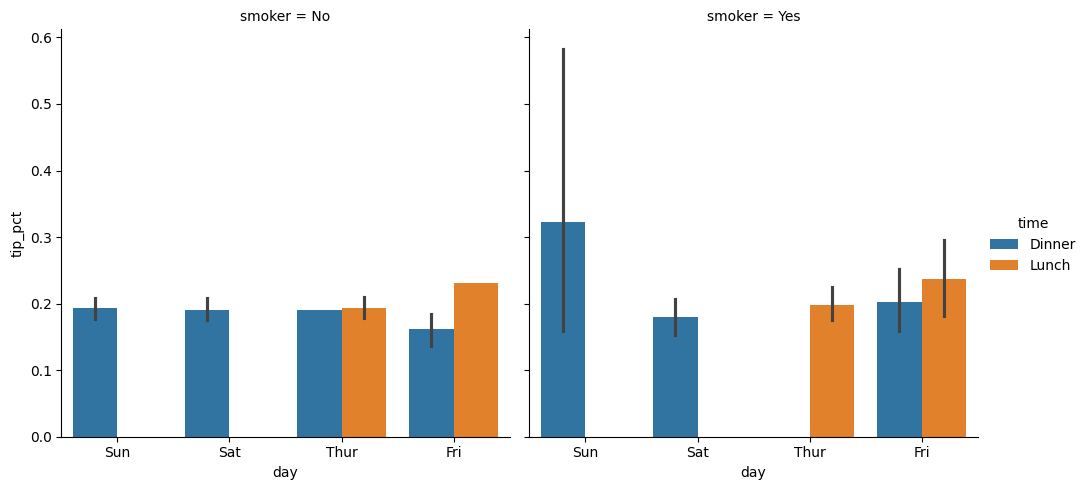

In [17]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips)

Instead of grouping by 'time' by different bar colors within a facet, we can also expand the facet grid by adding one row per time value:

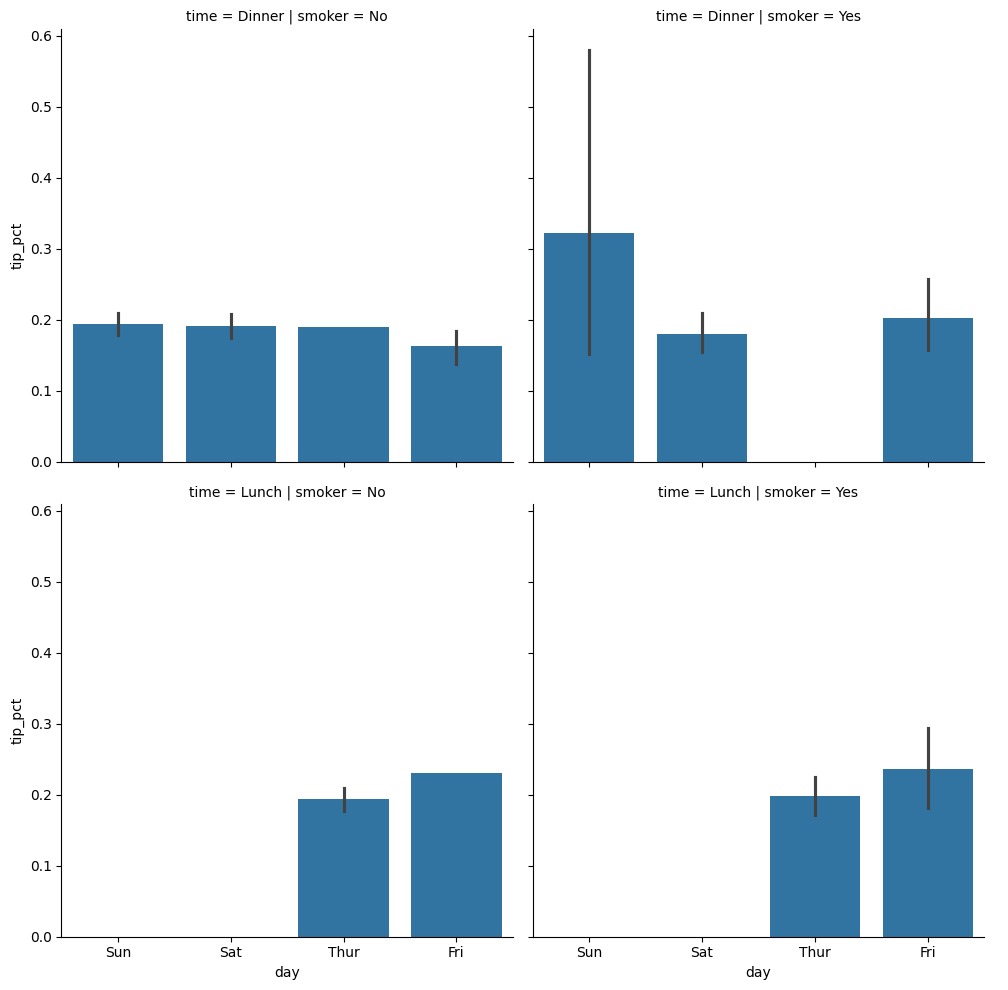

In [18]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips)

<code>catplot</code> supports other plot types that may be useful depending on what you are trying to display.

For example, **box** plots (which show the median, quartiles, and outliers) can be an effective visualization type:

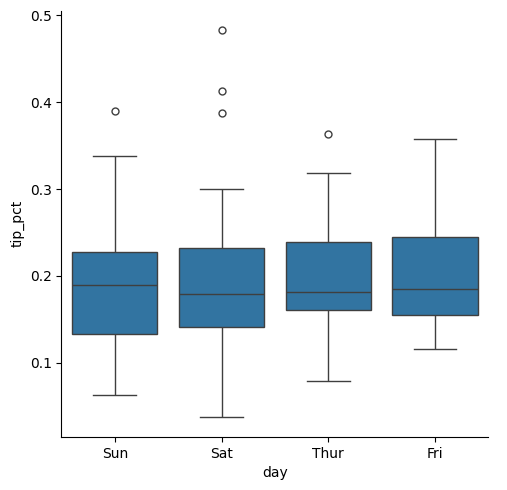

In [19]:
sns.catplot(x='day', y='tip_pct', kind='box', data=tips[tips.tip_pct < 0.5])

***
### Histograms and Density Plots

A histogram is a kind of bar plot that gives a **discretized display of value frequency**. The data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted.

Using the tipping data from before, we can make a histogram of tip percentages of the total bill using the <code>plot.hist()</code> method on the Series:

<Axes: ylabel='Frequency'>

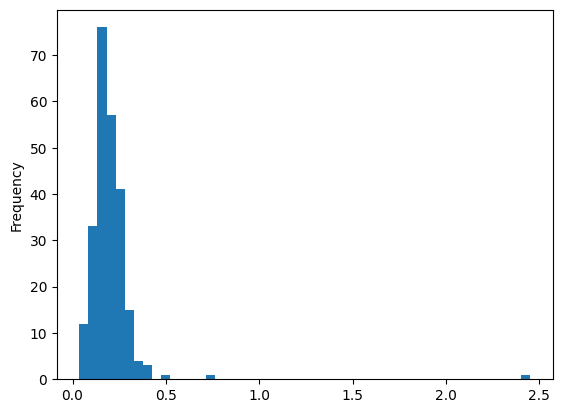

In [20]:
tips['tip_pct'].plot.hist(bins=50)

A related plot type is a **density plot**, which is formed by computing an estimate of a continuous probability distribution that might have generated the observed data:

<Axes: ylabel='Density'>

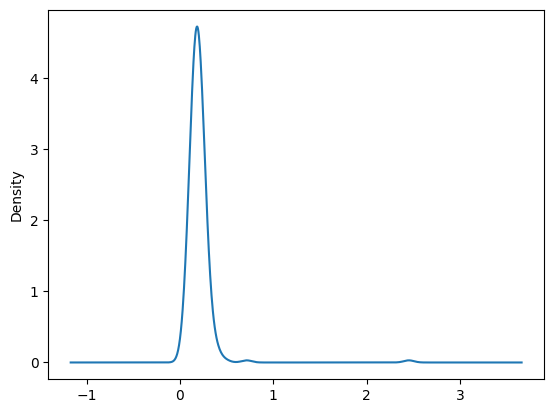

In [21]:
tips['tip_pct'].plot.density()

Seaborn makes histograms and density plots even easier through its <code>.histplot()</code> method, which can plot both a histogram and a continuous density estimate simultaneously.

As an example, consider a bimodal distribution consisting of draws from two different standard normal distributions:

In [22]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))

values

0       0.602157
1      -0.112513
2      -0.100402
3      -0.062112
4       0.657438
         ...    
395    11.056512
396    11.367500
397     8.407283
398     9.357556
399    12.273152
Length: 400, dtype: float64

<Axes: ylabel='Density'>

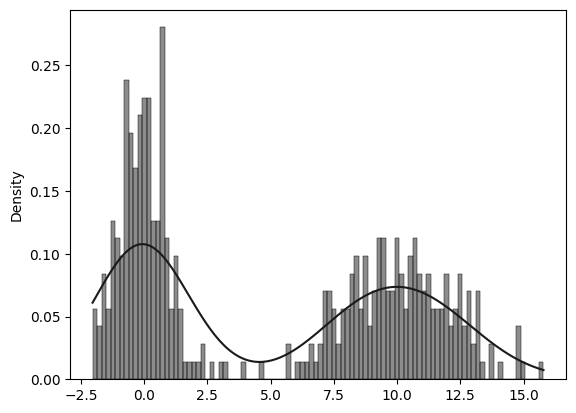

In [23]:
sns.histplot(values, bins=100, color='k', kde=True, stat="density")

***
### Scatter or Point Plots

Point plots or scatter plots can be a useful way of examining the relationship between two one-dimensional data series.

For example, here we load the <u>macrodata.csv</u>, select a few variables, then compute log differences:

In [24]:
macro = pd.read_csv('examples/macrodata.csv')

macro

year  quarter    realgdp  realcons   realinv  realgovt  realdpi  \
0    1959.0      1.0   2710.349    1707.4   286.898   470.045   1886.9   
1    1959.0      2.0   2778.801    1733.7   310.859   481.301   1919.7   
2    1959.0      3.0   2775.488    1751.8   289.226   491.260   1916.4   
3    1959.0      4.0   2785.204    1753.7   299.356   484.052   1931.3   
4    1960.0      1.0   2847.699    1770.5   331.722   462.199   1955.5   
..      ...      ...        ...       ...       ...       ...      ...   
198  2008.0      3.0  13324.600    9267.7  1990.693   991.551   9838.3   
199  2008.0      4.0  13141.920    9195.3  1857.661  1007.273   9920.4   
200  2009.0      1.0  12925.410    9209.2  1558.494   996.287   9926.4   
201  2009.0      2.0  12901.504    9189.0  1456.678  1023.528  10077.5   
202  2009.0      3.0  12990.341    9256.0  1486.398  1044.088  10040.6   

         cpi      m1  tbilrate  unemp      pop  infl  realint  
0     28.980   139.7      2.82    5.8  177.146  0.00     0.00  
1     29.150   141.7      3.08    5.1  177.830  2.34     0.74  
2     29.350   140.5      3.82    5.3  178.657  2.74     1.09  
3     29.370   140.0      4.33    5.6  179.386  0.27     4.06  
4     29.540   139.6      3.50    5.2  180.007  2.31     1.19  
..       ...     ...       ...    ...      ...   ...      ...  
198  216.889  1474.7      1.17    6.0  305.270 -3.16     4.33  
199  212.174  1576.5      0.12    6.9  305.952 -8.79     8.91  
200  212.671  1592.8      0.22    8.1  306.547  0.94    -0.71  
201  214.469  1653.6      0.18    9.2  307.226  3.37    -3.19  
202  216.385  1673.9      0.12    9.6  308.013  3.56    -3.44  

[203 rows x 14 columns]

In [25]:
data = macro[['cpi', 'm1', 'realgdp', 'unemp']]

trans_data = np.log(data).diff().dropna()
# np.log(): Natural logarithm
# diff(): First discrete difference of element

trans_data

cpi        m1   realgdp     unemp
1    0.005849  0.014215  0.024942 -0.128617
2    0.006838 -0.008505 -0.001193  0.038466
3    0.000681 -0.003565  0.003495  0.055060
4    0.005772 -0.002861  0.022190 -0.074108
5    0.000338  0.004289 -0.004685  0.000000
..        ...       ...       ...       ...
198 -0.007904  0.045361 -0.006781  0.105361
199 -0.021979  0.066753 -0.013805  0.139762
200  0.002340  0.010286 -0.016612  0.160343
201  0.008419  0.037461 -0.001851  0.127339
202  0.008894  0.012202  0.006862  0.042560

[202 rows x 4 columns]

We can then use seaborn's <code>regplot()</code> method, which makes a scatter plot and fits a linear regression line:

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

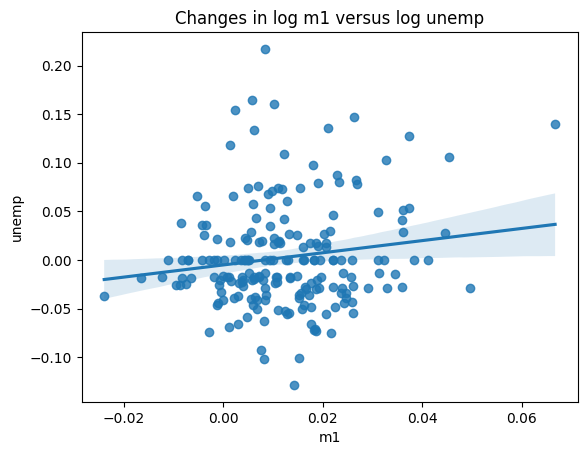

In [26]:
sns.regplot(x='m1', y='unemp', data=trans_data)

plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

***

### Conclusion

The goal of this chapter was to get your feet wet with some basic data visualization using **pandas**, **matplotlib**, and **seaborn**.

If visually communicating the results of data analysis is important in your work, I encourage you to seek out resources to learn more about effective data visualization.

It is an active field of research and you can practice with many excellent learning resources available online and in print form.

***
Example: plot of the World Population

In [27]:
import pandas as pd
import plotly.offline as offline

In [28]:
df = pd.read_csv('examples/worldbank_polulation.csv', encoding = 'ISO-8859-1')

# The sunburst plot requires weights (values), labels, and parent (region, or World)
# We build the corresponding table here
columns = ['parents', 'labels', 'values']

level1 = df.copy()
level1.columns = columns
level1['text'] = level1['values'].apply(lambda pop: '{:,.0f}'.format(pop))

level2 = df.groupby('region').population.sum().reset_index()[['region', 'region', 'population']]
level2.columns = columns
level2['parents'] = 'World'
# move value to text for this level
level2['text'] = level2['values'].apply(lambda pop: '{:,.0f}'.format(pop))
level2['values'] = 0

level3 = pd.DataFrame({'parents': [''], 'labels': ['World'],
                       'values': [0.0], 'text': ['{:,.0f}'.format(df['population'].sum())]})

all_levels = pd.concat([level1, level2, level3], axis=0).reset_index(drop=True)
all_levels

parents                      labels      values  \
0    Latin America & Caribbean                        Aruba    106537.0   
1                    South Asia                 Afghanistan  40099462.0   
2           Sub-Saharan Africa                       Angola  34503774.0   
3         Europe & Central Asia                     Albania   2811666.0   
4         Europe & Central Asia                     Andorra     79034.0   
..                          ...                         ...         ...   
221                       World  Middle East & North Africa         0.0   
222                       World               North America         0.0   
223                       World                  South Asia         0.0   
224                       World         Sub-Saharan Africa          0.0   
225                                                   World         0.0   

              text  
0          106,537  
1       40,099,462  
2       34,503,774  
3        2,811,666  
4           79,034  
..             ...  
221    486,167,363  
222    370,203,720  
223  1,901,911,604  
224  1,181,162,739  
225  7,864,921,177  

[226 rows x 4 columns]

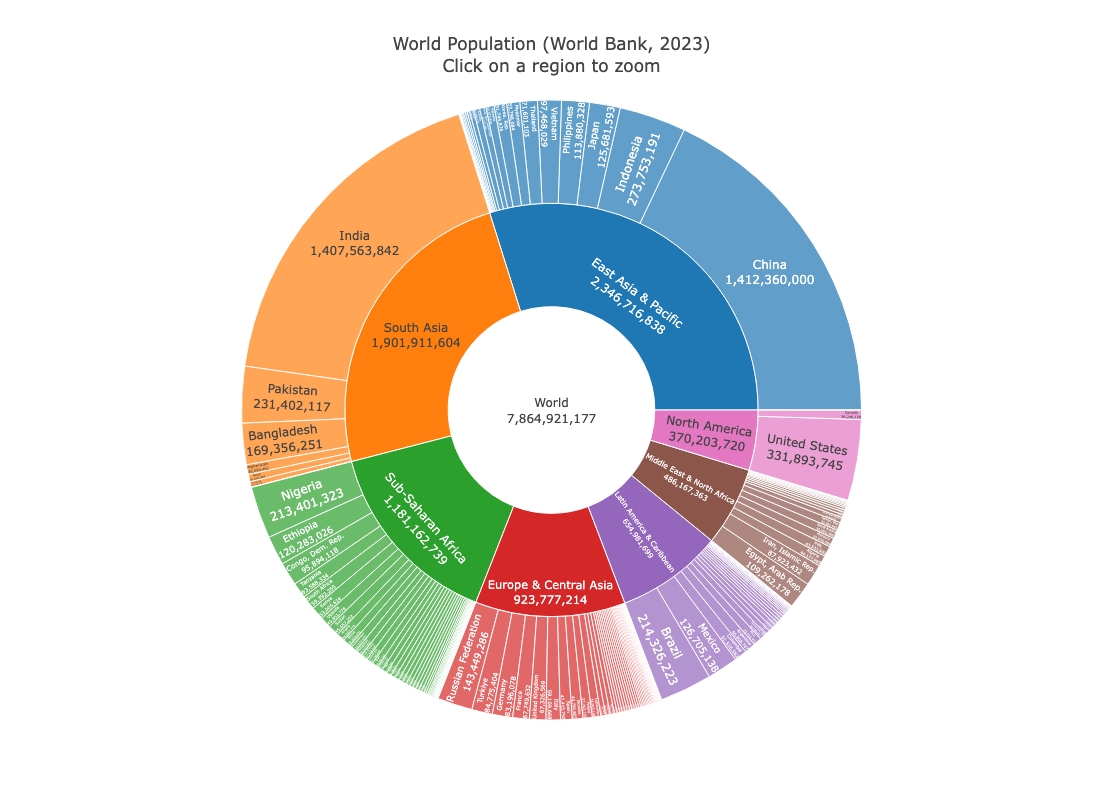

In [29]:
# And now we can plot the World Population
offline.iplot(dict(
    data=[dict(type='sunburst', hoverinfo='text', **all_levels)],
    layout=dict(title='World Population (World Bank, 2023)<br>Click on a region to zoom',
                width=800, height=800)),
    validate=False)